Query vector: [0.3377297353174458, 1.1054675298092147]
Nearest neighbors: [16, 28, 36, 55, 25, 88, 91, 74, 94, 61]


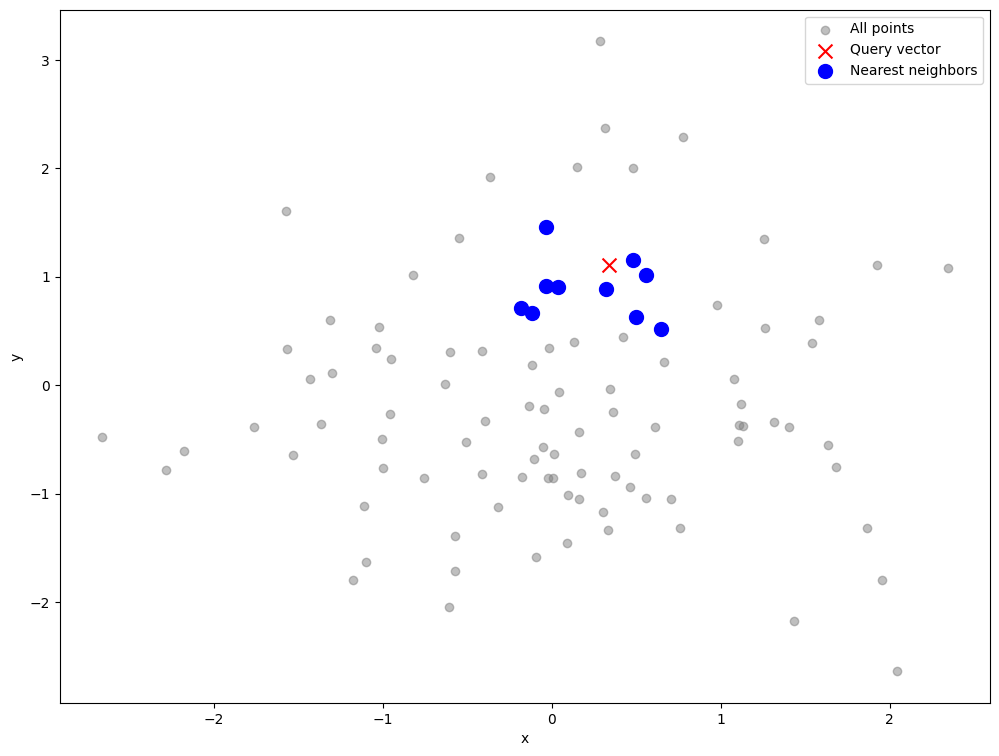

In [ ]:
!pip install annoy
from annoy import AnnoyIndex
import random
import matplotlib.pyplot as plt

# Parameters
num_features = 2  # 2-dimensional vectors
num_trees = 10

# Create an Annoy index
t = AnnoyIndex(num_features, 'euclidean')  # 'euclidean' is the metric

# Add items to the index
for i in range(100):
    v = [random.gauss(0, 1) for z in range(num_features)]
    t.add_item(i, v)

# Build the index with the specified number of trees
t.build(num_trees)

# Save the index to disk
t.save('test.ann')

# Load the index (optional, for demonstration)
u = AnnoyIndex(num_features, 'euclidean')
u.load('test.ann')

# Query the index for the 10 nearest neighbors to a random vector
query_vector = [random.gauss(0, 1) for z in range(num_features)]
nearest_neighbors = u.get_nns_by_vector(query_vector, 10)

# Print query vector and nearest neighbors
print("Query vector:", query_vector)
print("Nearest neighbors:", nearest_neighbors)

# Retrieve the vectors of the nearest neighbors
nearest_vectors = [u.get_item_vector(neighbor) for neighbor in nearest_neighbors]

# Plotting
plt.figure(figsize=(12, 9))

# Plot all points
all_points = [t.get_item_vector(i) for i in range(100)]
all_points_x = [point[0] for point in all_points]
all_points_y = [point[1] for point in all_points]
plt.scatter(all_points_x, all_points_y, c='gray', alpha=0.5, label='All points')

# Plot query vector
plt.scatter(query_vector[0], query_vector[1], c='red', marker='x', s=100, label='Query vector')

# Plot nearest neighbors
nearest_vectors_x = [vec[0] for vec in nearest_vectors]
nearest_vectors_y = [vec[1] for vec in nearest_vectors]
plt.scatter(nearest_vectors_x, nearest_vectors_y, c='blue', marker='o', s=100, label='Nearest neighbors')

# Add legend
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
